# Assignment 6 Logistic Regression

### Bank dataset

| Sr. No | Features | Description |
|:-------|:---------|:------------|
|1|age| (numeric)|
|2|job|type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")|
|3|marital|marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)|
|4|education| (categorical: "unknown","secondary","primary","tertiary")|
|5|default|has credit in default? (binary: "yes","no")|
|6|balance|average yearly balance, in euros (numeric)|
|7|housing|has housing loan? (binary: "yes","no")|
|8|loan|has personal loan? (binary: "yes","no")|
|9|contact|#related with the last contact of the current campaign: contact communication type (categorical: "unknown","telephone","cellular")| 
|10|day|last contact day of the month (numeric)|
|11|month|last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")|
|12|duration|last contact duration, in seconds (numeric)|
|13|campaign|#other attributes: number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|14|pdays|number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)|
|15|previous| number of contacts performed before this campaign and for this client (numeric)|
|16|poutcome|outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")|  
|17|Output variable (desired target): y| has the client subscribed a term deposit? (binary: "yes","no")|

<br>Missing Attribute Values: None<br>

# Classification using Logistic Regression

1. Load and clean the dataset

2. We may begin with Exploratory Data Analysis to understand the features in dataset.    
    - **Correlating:** How well each feature correlate with label/target feature
    - **Completing:** Fill the missing values of significant features with appropriate values
    - **Correcting:** Drop the features that may not directly or indirectly contribute to the analysis or features with large number of missing values and duplicates
    - **Creating:** Engineer new features- convert continuous into categorical, new categories of features/scaled/fare range features, extract new information from existing feature
    - **Classifying:** add to our assumptions based on observation

3. Feature Scaling and train-test split

4. Model Development- train and fit

5. Model performance evaluation: Use classification report - accuracy, recall, precision, F1-score, Confusion matrix

**1. Load and clean the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [3]:
df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']]=df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand = True)
df = df.drop(columns='age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"')
df = df.applymap(lambda x: x.strip('"'))

In [4]:
df.columns
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
df = df.apply(pd.to_numeric, errors='ignore')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Now that our dataset is clean. Let's explore the dataset to understand it more

**2. Exploratory Data Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Duplicate data: 0


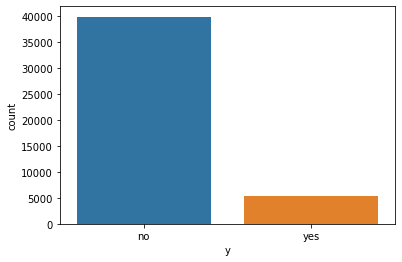

In [7]:
#There are no missing values
#Lets check for duplicated rows
print(f'Duplicate data: {df.duplicated().sum()}')

# Let's see if dataset is balanced or not
sns.countplot(x='y',data=df);
# we observe that dataset is imbalanced. Hence we need to evaluate out classification model using metrics like recall, precision

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


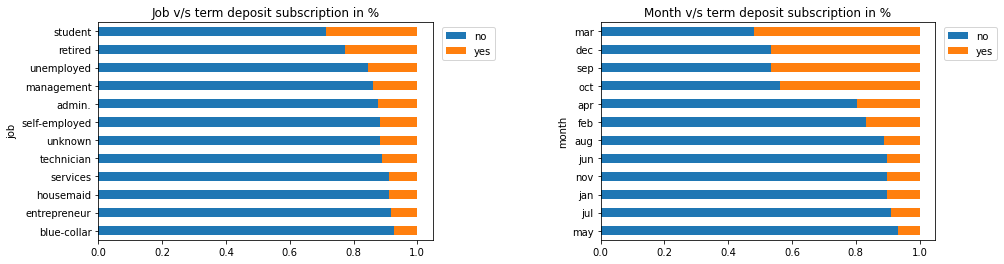

In [10]:
fig,axes = plt.subplots(1,2,figsize=(15,4))

plt.subplots_adjust(wspace=0.5)

pd.crosstab(index=df.job,columns=df.y,normalize='index').sort_values(by='yes').plot(kind='barh',stacked=True,ax=axes[0]);
axes[0].legend(bbox_to_anchor=(1.2,1))
axes[0].set_title('Job v/s term deposit subscription in %');

pd.crosstab(index=df.month,columns=df.y,normalize='index').sort_values(by='yes').plot(kind='barh',stacked=True,ax=axes[1]);
axes[1].legend(bbox_to_anchor= [1.2,1])
axes[1].set_title('Month v/s term deposit subscription in %');

# We observe that student, retired and unemployed have more chances of subscribing to term deposit
# mar,dec,sep and oct were best performing months

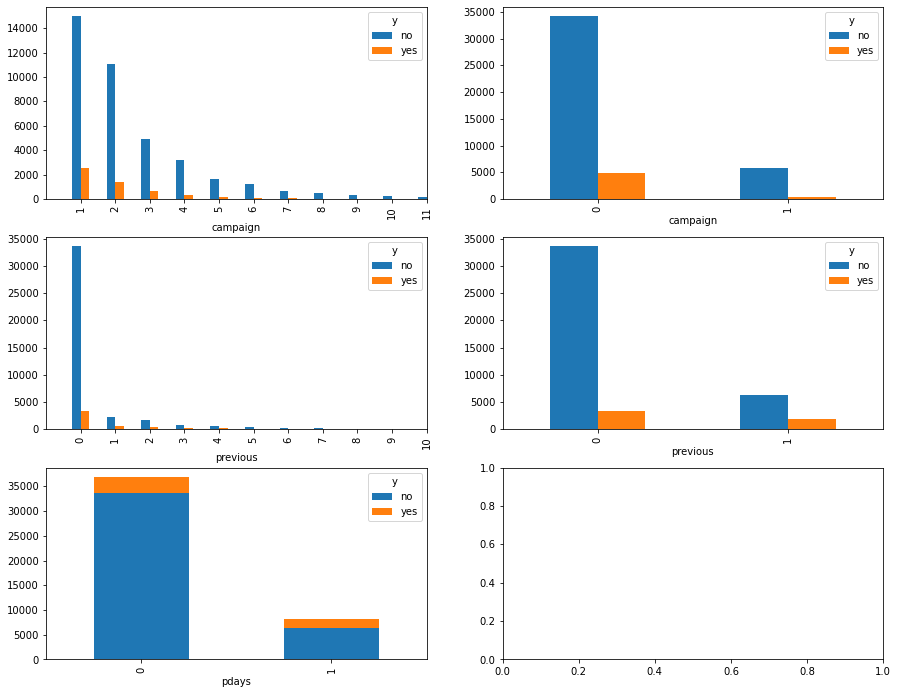

In [11]:
df_campaign = df.copy()
df_campaign.loc[df['campaign']<5,'campaign'] = 0
df_campaign.loc[df['campaign']>=5,'campaign'] = 1

fig,axes = plt.subplots(3,2,figsize=(15,12))

df.groupby(['campaign','y']).size().unstack().plot(kind='bar',ax=axes[0][0])
axes[0][0].set_xlim(-1,10)

df_campaign.groupby(['campaign','y']).size().unstack().plot(kind='bar',ax=axes[0][1]);

df_previous = df.copy()
df_previous.loc[df['previous']<1,'previous'] = 0
df_previous.loc[df['previous']>=1,'previous'] = 1

df.groupby(['previous','y']).size().unstack().plot(kind='bar',ax=axes[1][0])
axes[1][0].set_xlim(-1,10)

df_previous.groupby(['previous','y']).size().unstack().plot(kind='bar',ax=axes[1][1]);

df_pdays = df.copy()
df_pdays.loc[df_pdays['pdays'] < 0,'pdays']=0
df_pdays.loc[df_pdays['pdays']> 0,'pdays']=1
df_pdays.groupby(['pdays','y']).size().unstack().plot(kind='bar',stacked=True,ax= axes[2][0]);

# when campaign calls are upto 4 - calls are more likely to be success
# when they exceed 4 calls- clients are less likely to subscribe

# when there was previous campaign, clients were more likely to show positive outcome 

# More proportion of previously contacted clients are to avail TD compared to those who were never contacted

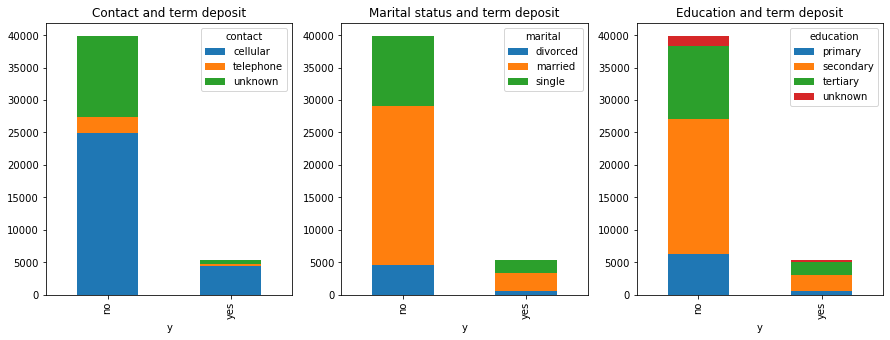

In [12]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
df.groupby(['y', 'contact']).size().unstack().plot(kind='bar', stacked=True,ax=axes[0])
axes[0].set_title('Contact and term deposit')

df.groupby(['y', 'marital']).size().unstack().plot(kind='bar', stacked=True,ax=axes[1])
axes[1].set_title('Marital status and term deposit')

df.groupby(['y', 'education']).size().unstack().plot(kind='bar', stacked=True,ax=axes[2])
axes[2].set_title('Education and term deposit');

# Most of the clients have subscribed to T.D when contacted via cellular route
# The chances of clients availing T.D as per marital status is single>married>divorced
# Tertiary and secondary educated are more likely to avail T.D facility

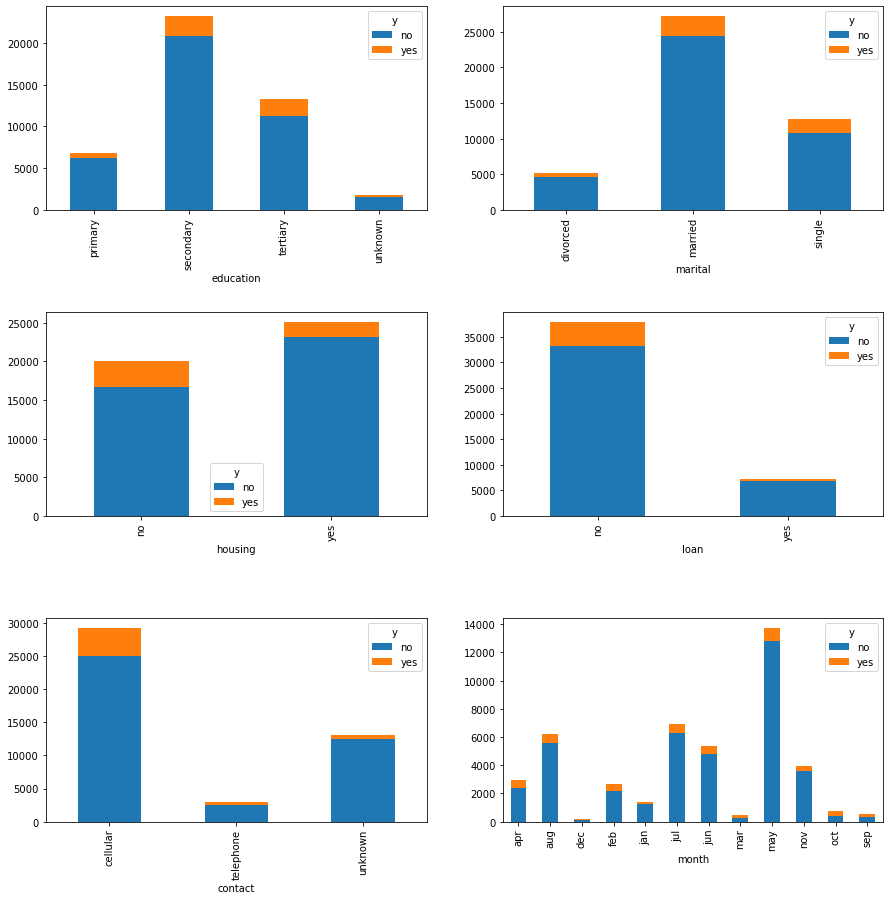

In [13]:
fig,axes = plt.subplots(3,2,figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

df.groupby(['education', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[0][0])

df.groupby(['marital', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[0][1])

df.groupby(['housing', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[1][0])

df.groupby(['loan', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[1][1])

df.groupby(['contact', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[2][0])

df.groupby(['month', 'y']).size().unstack().plot(kind='bar', stacked=True,ax=axes[2][1])
axes[1][1].set_title('');

# While oct,sep,dec,mar were best performing months, they were least active as well. Interestingly jan, jul were
# worst performing months yet most active.

# Clients irrespective of housing loan subscribe to TD, yet those without a housing loan are more likely to subscribe.

In [14]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

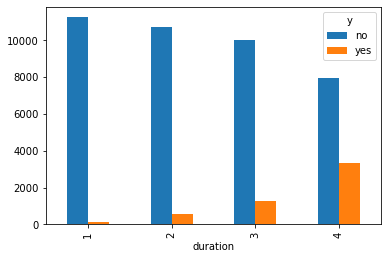

In [15]:
df_dur = df.copy()
df_dur.loc[df_dur['duration']<104,'duration'] = 1
df_dur.loc[(df_dur['duration']>=104) & (df_dur['duration']<=180),'duration'] = 2
df_dur.loc[(df_dur['duration']>180) & (df_dur['duration']<=319),'duration'] = 3
df_dur.loc[df_dur['duration']>319,'duration'] = 4
df_dur.groupby(['duration','y']).size().unstack().plot(kind='bar');

# As call duration increases so do the chances of clients subscribing to T.D

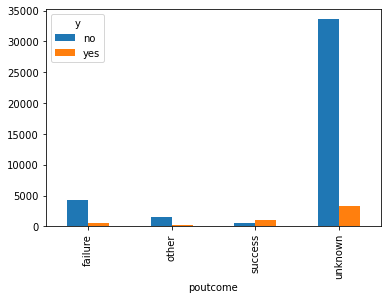

In [16]:
df.groupby(['poutcome','y']).size().unstack().plot(kind='bar');

# when poutcome is success, T.D subscription is more likely to occur 

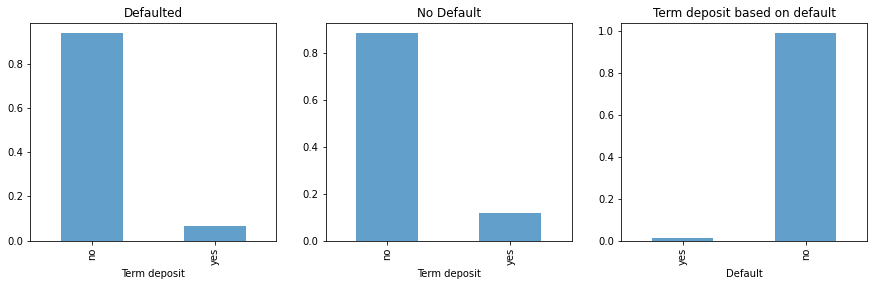

In [17]:
fig,axes = plt.subplots(1,3,figsize=(15,4))

default = df[df['default']=='yes']
default['y'].value_counts(normalize=True).plot(kind='bar',alpha=0.7,ax=axes[0])
axes[0].set_title('Defaulted')
axes[0].set_xlabel('Term deposit')

default = df[df['default']=='no']
default['y'].value_counts(normalize=True).plot(kind='bar',alpha=0.7,ax=axes[1])
axes[1].set_title('No Default')
axes[1].set_xlabel('Term deposit')

df['default'][df['y']=='yes'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7,ax=axes[2])
axes[2].set_title('Term deposit based on default')
axes[2].set_xlabel('Default');

# Most of term deposit subscribers belong to no-default category, not all non defaulters are subscriber though

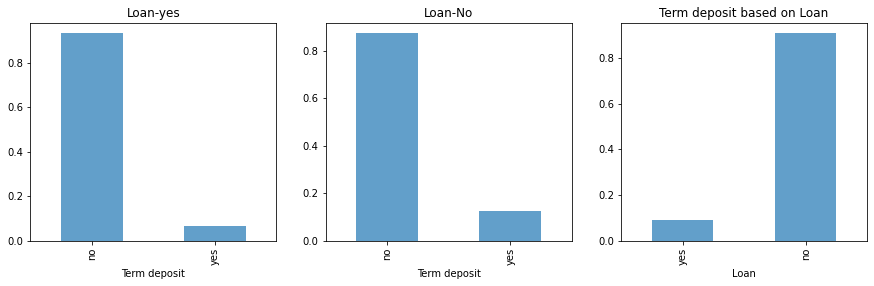

In [18]:
fig,axes = plt.subplots(1,3,figsize=(15,4))

default = df[df['loan']=='yes']
default['y'].value_counts(normalize=True).plot(kind='bar',alpha=0.7,ax=axes[0])
axes[0].set_title('Loan-yes')
axes[0].set_xlabel('Term deposit')

default = df[df['loan']=='no']
default['y'].value_counts(normalize=True).plot(kind='bar',alpha=0.7,ax=axes[1])
axes[1].set_title('Loan-No')
axes[1].set_xlabel('Term deposit')

df['loan'][df['y']=='yes'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7,ax=axes[2])
axes[2].set_title('Term deposit based on Loan')
axes[2].set_xlabel('Loan');

# Clients irrespective of loan tend to subscribe to term deposits, however clients with no loans form a major chunk
# Also small percentage of no-loan clients have subscribed to term deposit 

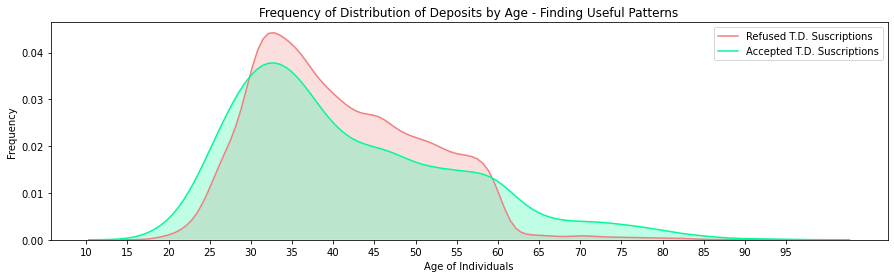

In [19]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['y'] == 'no'),'age'] , color='#F08080',shade=True,label='Refused T.D. Suscriptions')
ax=sns.kdeplot(df.loc[(df['y'] == 'yes'),'age'] , color='#00FA9A',shade=True, label='Accepted T.D. Suscriptions')
ax.set(xlabel='Age of Individuals', ylabel='Frequency')
plt.xticks(np.arange(10,100,5))
plt.title('Frequency of Distribution of Deposits by Age - Finding Useful Patterns');

# In line with the observations made on job profile, clients in age group of <30 (student) and >60 (retirees) are 
# more likely to accept term deposit subscriptions.

In [20]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

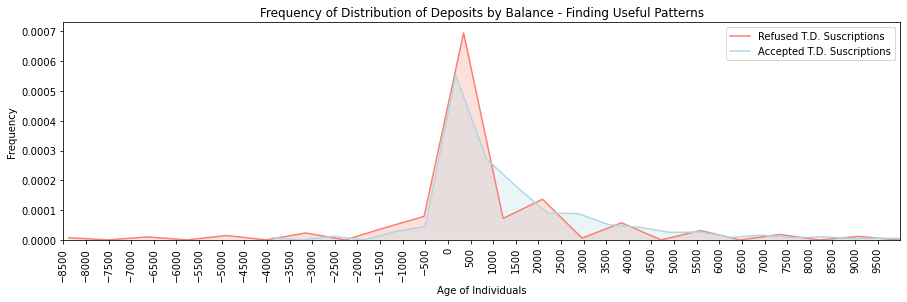

In [21]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['y'] == 'no'),'balance'] , color='salmon',shade=True,label='Refused T.D. Suscriptions')
ax=sns.kdeplot(df.loc[(df['y'] == 'yes'),'balance'] , color='lightblue',shade=True, label='Accepted T.D. Suscriptions')
ax.set(xlabel='Age of Individuals', ylabel='Frequency')
plt.xlim(-8500,10000)
plt.xticks(np.arange(-8500,10000,500),rotation=90)
plt.title('Frequency of Distribution of Deposits by Balance - Finding Useful Patterns');

#clients with balance less than 1000 are more likely to refuse term deposit subscriptions

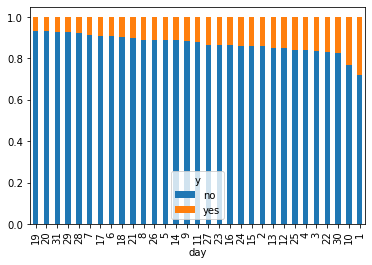

In [22]:
pd.crosstab(index=df.day, columns= df.y, normalize='index').sort_values(by='yes').plot(kind='bar', stacked=True);

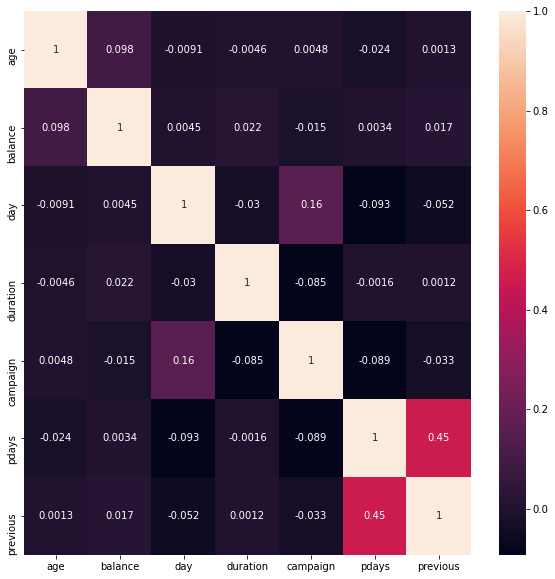

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

Now that we have performed EDA and gained some insights, let's move on to the next step i.e Feature engineering.
We shall transform our features to assist classification task/make it suitable for Logistic Regression modeling, split the dataset into train-test sets and scale the features. 

**3. Feature engineering**

In [24]:
# Drop insignificant columns - pdays, poutcome, day and housing
df = df.drop(columns=['pdays','poutcome','day'])

# Integer encoding - month, job
df['job'] = df['job'].map({'management':2, 'technician':2, 'entrepreneur':1, 'blue-collar':1,'unknown':2, 'retired':3, 'admin.':2, 'services':1, 'self-employed':2,'unemployed':2, 'housemaid':1, 'student':3})
df['month'] = df['month'].map({'may':1, 'jun':1, 'jul':1, 'aug':1, 'oct':3, 'nov':1, 'dec':3, 'jan':1, 'feb':2,'mar':3, 'apr':2, 'sep':3})

# One hot encoding - loan, default
df1 = pd.get_dummies(df[['loan','default','housing']],columns=['loan','default','housing'],drop_first=True)

# Binning - Continuous to discrete, Transforming features to increase its significance - Balance, age, duration, cellular
# education, marital, previous, campaign
df.loc[df['campaign']<5,'campaign'] = 0
df.loc[df['campaign']>=5,'campaign'] = 1

df.loc[df['previous']<1,'previous'] = 0
df.loc[df['previous']>=1,'previous'] = 1

df['marital'] = df.marital.map({'single':2, 'married':1, 'divorced':0})

df['education'] = df.education.map({'tertiary':1, 'secondary':1, 'unknown':0, 'primary':0})

df['contact'] = df.contact.map({'unknown':0, 'cellular':1, 'telephone':0})

df.loc[df['duration']<104,'duration'] = 1
df.loc[(df['duration']>=104) & (df['duration']<=180),'duration'] = 2
df.loc[(df['duration']>180) & (df['duration']<=319),'duration'] = 3
df.loc[df['duration']>319,'duration'] = 4

df.loc[(df['age']<30) & (df['age']>60), 'age'] = 1
df.loc[(df['age']>30) & (df['age']<60), 'age'] = 0

df.loc[(df['balance']<1000),'balance']=0
df.loc[(df['balance']>1000),'balance']=1

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,y
0,0,2,1,1,no,1,yes,no,0,1,3,0,0,no
1,0,2,2,1,no,0,yes,no,0,1,2,0,0,no
2,0,1,1,1,no,0,yes,yes,0,1,1,0,0,no
3,0,1,1,0,no,1,yes,no,0,1,1,0,0,no
4,0,2,2,0,no,0,no,no,0,1,3,0,0,no


In [25]:
# Label encoding - y
df['y'] = df.y.map({'no':0, 'yes':1})

df = df.drop(columns=['loan','default','housing'])
df = pd.concat([df,df1],axis=1)

target = df.y
df = df.drop(columns='y')
df.insert(13,column='term_deposit',value=target)

df.head()

,age,job,marital,education,balance,contact,month,duration,campaign,previous,loan_yes,default_yes,housing_yes,term_deposit
0,0,2,1,1,1,0,1,3,0,0,0,0,1,0
1,0,2,2,1,0,0,1,2,0,0,0,0,1,0
2,0,1,1,1,0,0,1,1,0,0,1,0,1,0
3,0,1,1,0,1,0,1,1,0,0,0,0,1,0
4,0,2,2,0,0,0,1,3,0,0,0,0,0,0


**4. Model development**

In [26]:
# Features - X and label - y
X = df.drop(columns='term_deposit')
y = df['term_deposit']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.43973106, -1.18553343, -0.27668031, ..., -0.43859406,
        -0.13811321,  0.8923425 ],
       [-0.43973106, -1.18553343,  1.36974507, ..., -0.43859406,
        -0.13811321, -1.12064594],
       [ 1.15254165,  2.19217921,  1.36974507, ..., -0.43859406,
        -0.13811321,  0.8923425 ],
       ...,
       [-0.43973106,  0.50332289, -1.9231057 , ..., -0.43859406,
        -0.13811321,  0.8923425 ],
       [-0.43973106,  0.50332289, -1.9231057 , ...,  2.28001263,
        -0.13811321,  0.8923425 ],
       [-0.43973106,  0.50332289, -0.27668031, ..., -0.43859406,
        -0.13811321, -1.12064594]])

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**5. Model Evaluation**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7781,  171],
       [ 858,  233]], dtype=int64)

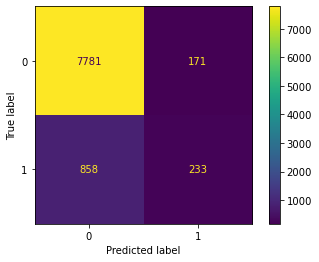

In [31]:
plot_confusion_matrix(model,X_test,y_test)

In [32]:
print(classification_report(y_test,y_pred))

# Recall and precision for 1 needs further improvement

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.86      0.89      0.86      9043



# Thank you!

In [33]:
df.select_dtypes(include='object').columns

data = df.groupby(['pdays','y']).size().unstack()
index = data[data['no'].isnull()].index.tolist()
index

index_yes = data[data['yes'].isnull()].index.tolist()
index_yes

df_pdays.iloc[index_yes,-4] = 0
df_pdays.iloc[index,-4] = 1
index_rest = df_pdays[~(df_pdays.index.isin(index)) & ~(df_pdays.index.isin(index_yes))].index.tolist()
df_pdays.iloc[index_rest,-4] = 2
df_pdays.groupby(['pdays','y']).size().unstack().plot(kind='bar',stacked=True)

np.sort(df['previous'].unique())
#df['previous'].value_counts()
# bins --> 0, 1-3, 4-8, >9

KeyError: 'pdays'